1. Check the proportion of metal, mining, and others sector in Country_01 and whether the difference is 
statistically significant? 

In [29]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Data Exploration (Pre processing)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB
None

First Few Rows:
   Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-0

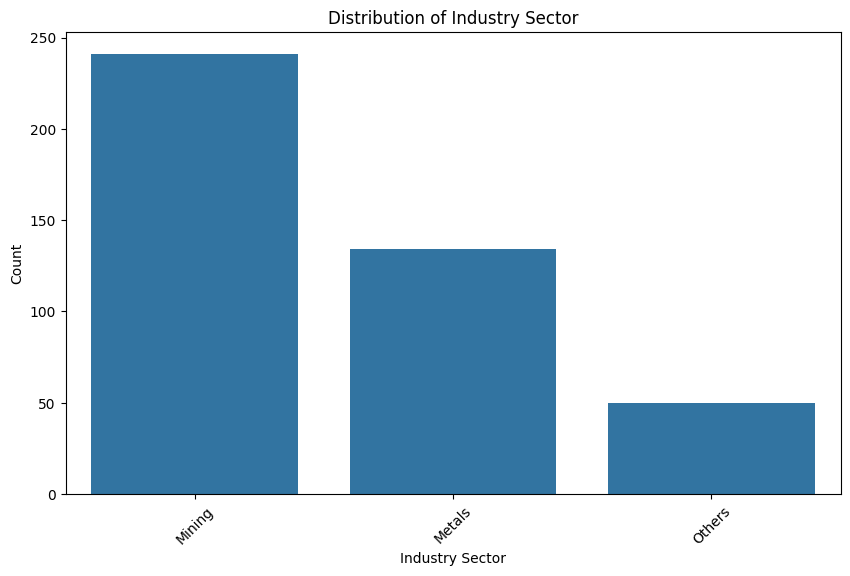

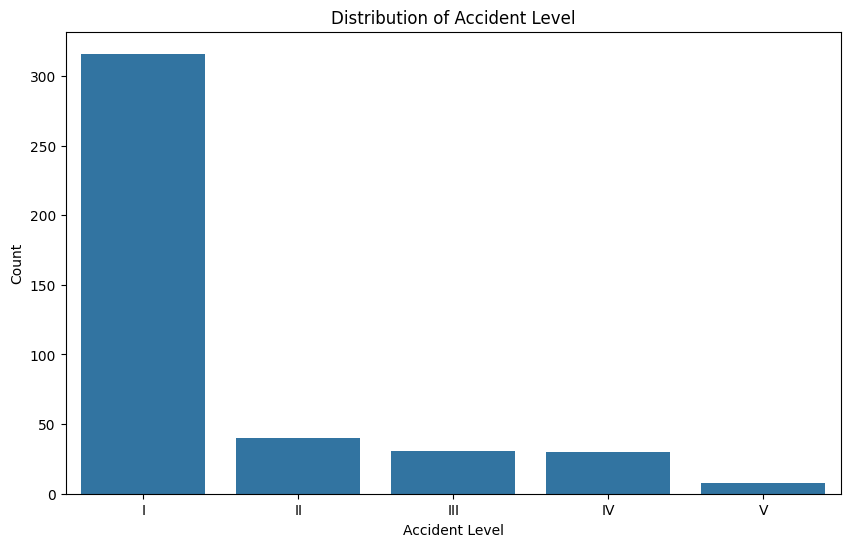

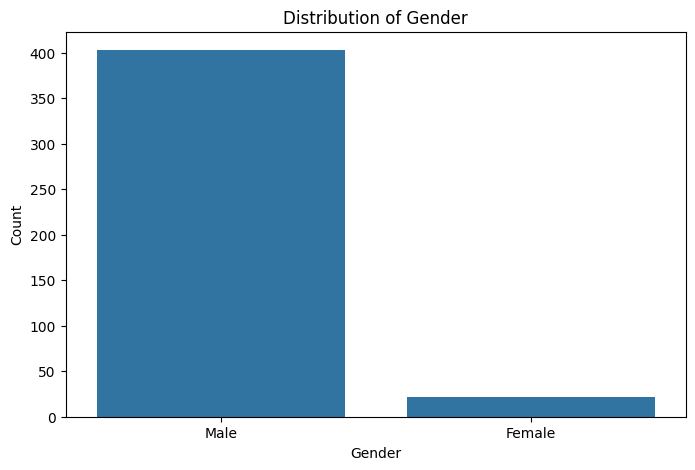

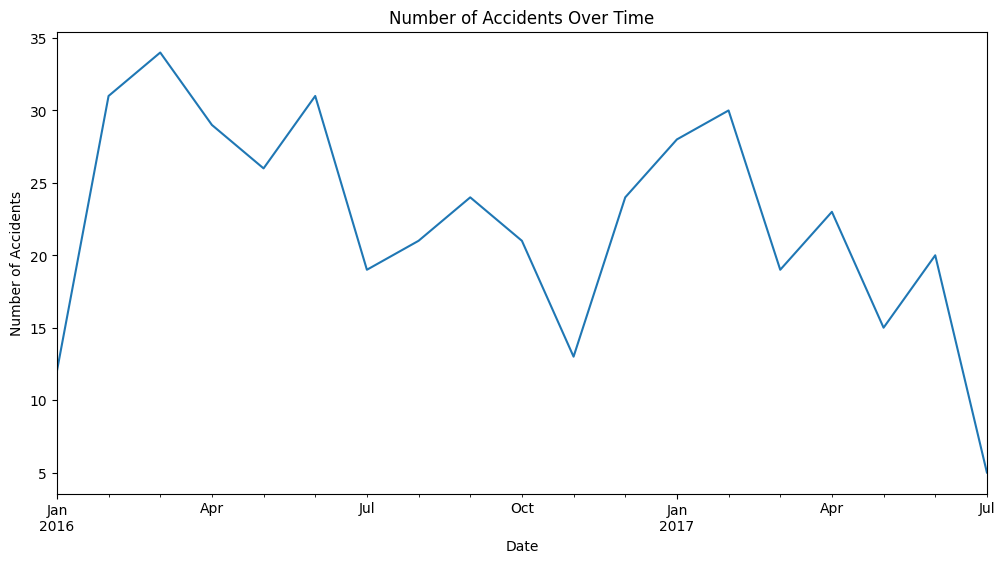

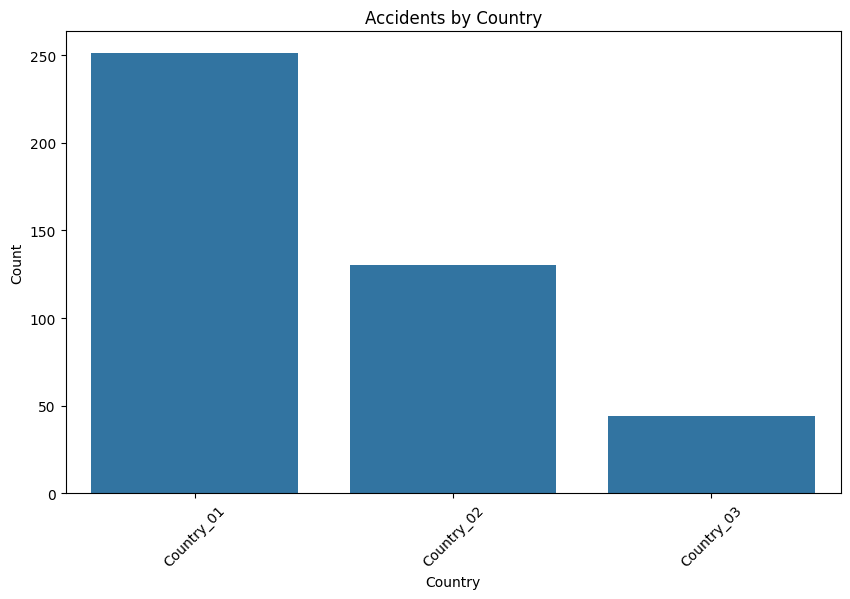

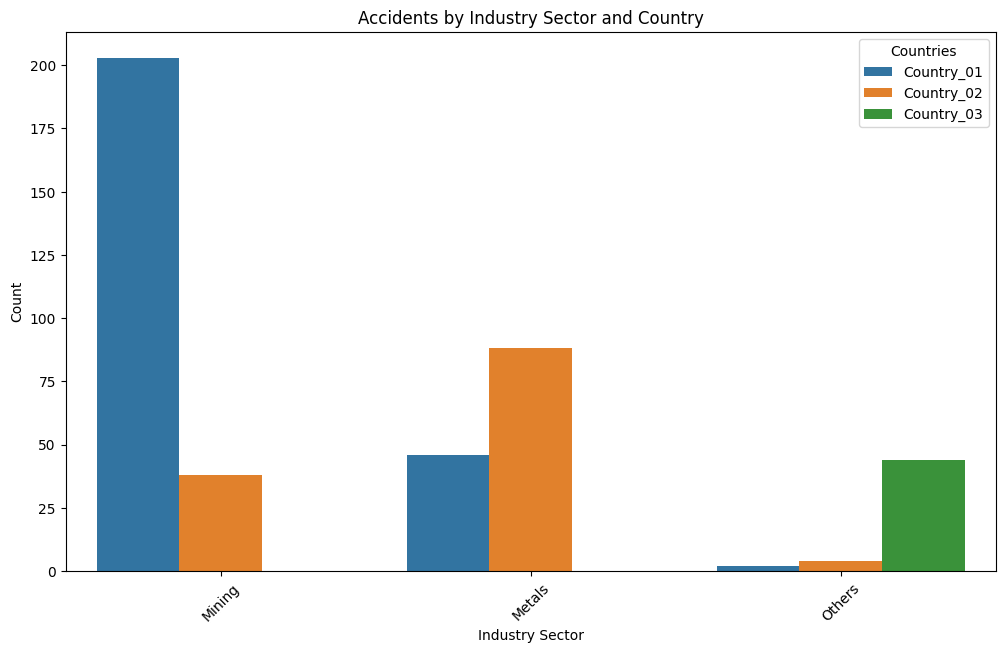

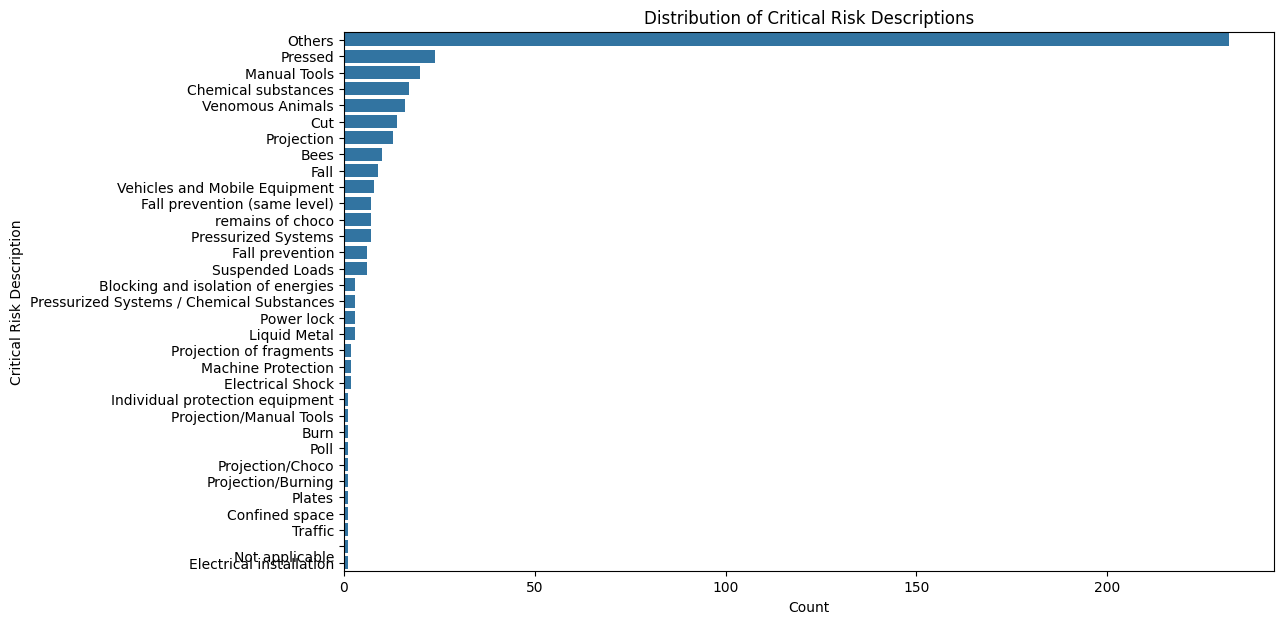

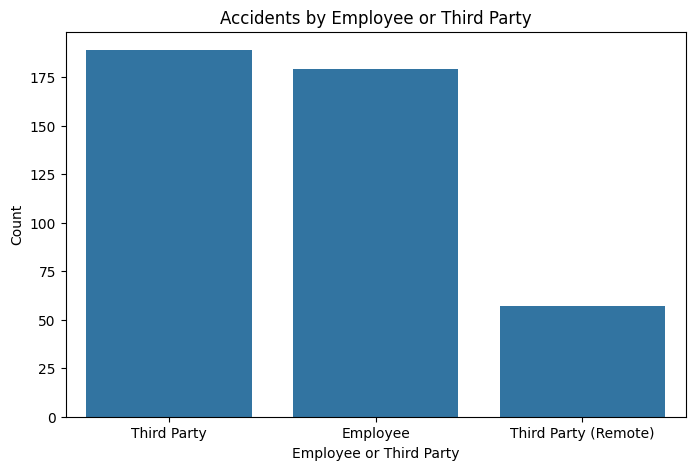

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'D:/Consultancy/ATRONS/Baacumen Data Science Bootcamp/3 EDA/Assignment/dataset.csv'
data = pd.read_csv(url)

# 1. Understand Basic Information
print("Basic Information:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())

# 2. Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# 3. Statistical Summary
print("\nStatistical Summary:")
print(data.describe(include='all'))

# 4. Distribution of Key Variables
# Distribution of Industry Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Industry Sector', order=data['Industry Sector'].value_counts().index)
plt.title('Distribution of Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Accident Level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Accident Level', order=sorted(data['Accident Level'].unique()))
plt.title('Distribution of Accident Level')
plt.xlabel('Accident Level')
plt.ylabel('Count')
plt.show()

# Distribution of Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Genre')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 5. Visualize Relationships and Trends
# Accidents over Time
data['Data'] = pd.to_datetime(data['Data'])
plt.figure(figsize=(12, 6))
data.set_index('Data').resample('M').size().plot()
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Country
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Countries', order=data['Countries'].value_counts().index)
plt.title('Accidents by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Accidents by Industry Sector and Country
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x='Industry Sector', hue='Countries', order=data['Industry Sector'].value_counts().index)
plt.title('Accidents by Industry Sector and Country')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 6. Explore Categorical Data
# Critical Risk Description
plt.figure(figsize=(12, 7))
sns.countplot(data=data, y='Critical Risk', order=data['Critical Risk'].value_counts().index)
plt.title('Distribution of Critical Risk Descriptions')
plt.xlabel('Count')
plt.ylabel('Critical Risk Description')
plt.show()

# 7. Explore Accidents by Employee or Third Party
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Employee or Third Party')
plt.title('Accidents by Employee or Third Party')
plt.xlabel('Employee or Third Party')
plt.ylabel('Count')
plt.show()

# Optional: Save the plots if needed
# plt.savefig('path_to_save_plot.png')


In [27]:
# Solution to QUestion #1

Proportion test for Metal: p-value = 0.00000
Proportion test for Mining: p-value = 0.00000
Proportion test for Others: p-value = 0.00000
The proportion of Metal is significantly different from the expected proportion.
The proportion of Mining is significantly different from the expected proportion.
The proportion of Others is significantly different from the expected proportion.


<Figure size 1000x600 with 0 Axes>

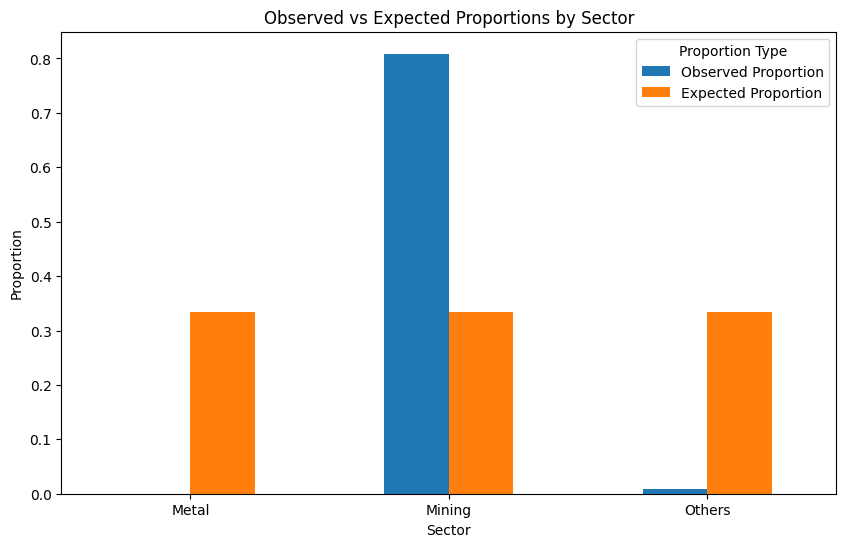

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest

# Load the dataset
url = 'D:/Consultancy/ATRONS/Baacumen Data Science Bootcamp/3 EDA/Assignment/dataset.csv'
data = pd.read_csv(url)

# Filter data for Country_01
country_data = data[data['Countries'] == 'Country_01']

# Get the counts of each Industry Sector
sector_counts = country_data['Industry Sector'].value_counts()
total_count = sector_counts.sum()

# Define sectors and expected proportions
sectors = ['Metal', 'Mining', 'Others']
expected_proportion = 1 / len(sectors)  # Assuming equal proportions for the test

# Perform proportion tests
results = {}
for sector in sectors:
    observed_count = sector_counts.get(sector, 0)
    result = binomtest(observed_count, total_count, expected_proportion, alternative='two-sided')
    results[sector] = result.pvalue

# Print results
for sector, p_value in results.items():
    print(f"Proportion test for {sector}: p-value = {p_value:.5f}")

# Interpretation
alpha = 0.05
for sector, p_value in results.items():
    if p_value < alpha:
        print(f"The proportion of {sector} is significantly different from the expected proportion.")
    else:
        print(f"The proportion of {sector} is not significantly different from the expected proportion.")

# Calculate observed proportions
observed_proportions = {sector: count / total_count for sector, count in sector_counts.items()}
expected_proportions = {sector: expected_proportion for sector in sectors}

# Create a DataFrame for plotting
df_proportions = pd.DataFrame({
    'Sector': sectors,
    'Observed Proportion': [observed_proportions.get(sector, 0) for sector in sectors],
    'Expected Proportion': [expected_proportions[sector] for sector in sectors]
})

# Plotting
plt.figure(figsize=(10, 6))
df_proportions.set_index('Sector').plot(kind='bar', figsize=(10, 6))
plt.title('Observed vs Expected Proportions by Sector')
plt.ylabel('Proportion')
plt.xlabel('Sector')
plt.xticks(rotation=0)
plt.legend(title='Proportion Type')
plt.show()


2. Employee type by Gender - Is the distribution of employee type differ significantly gender wise?

In [30]:
# Solution to Question #2

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
url = 'D:/Consultancy/ATRONS/Baacumen Data Science Bootcamp/3 EDA/Assignment/dataset.csv'
data = pd.read_csv(url)

# Prepare the contingency table for Employee Type by Gender
contingency_table = pd.crosstab(data['Genre'], data['Employee or Third Party'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)

# Print results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-Value: {:.5f}".format(p))
print("Degrees of Freedom: {}".format(dof))
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation
alpha = 0.05
if p < alpha:
    print(f"\nThe distribution of employee types differs significantly by gender (p-value = {p:.5f}).")
else:
    print(f"\nThe distribution of employee types does not differ significantly by gender (p-value = {p:.5f}).")


Contingency Table:
Employee or Third Party  Employee  Third Party  Third Party (Remote)
Genre                                                               
Female                          8            9                     5
Male                          171          180                    52

Chi-Square Statistic: 1.75
P-Value: 0.41692
Degrees of Freedom: 2

Expected Frequencies Table:
Employee or Third Party    Employee  Third Party  Third Party (Remote)
Genre                                                                 
Female                     9.265882     9.783529              2.950588
Male                     169.734118   179.216471             54.049412

The distribution of employee types does not differ significantly by gender (p-value = 0.41692).


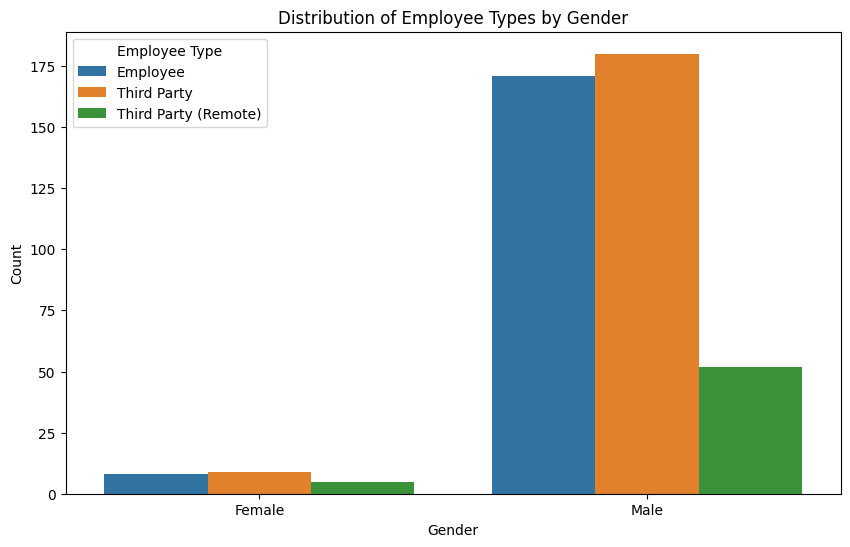

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
df_plot = pd.melt(contingency_table.reset_index(), id_vars='Genre', var_name='Employee Type', value_name='Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Genre', y='Count', hue='Employee Type')
plt.title('Distribution of Employee Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Employee Type')
plt.show()
